##### 학습목표
- 기울기(w)
- 절편(b)
- 회귀 평가 방법
- 피처, 타켓의 스케일링
- 캐글데이터를 활용한 실습

In [1]:


from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as ms
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [2]:
# 기울기 & 절편

X = [8.70153760, 3.90825773, 1.89362433, 3.28730045, 7.39333004, 2.98984649, 2.25757240, 9.84450732, 9.94589513, 5.48321616]
Y = [5.64413093, 3.75876583, 3.87233310, 4.40990425, 6.43845020, 4.02827829, 2.26105955, 7.15768995, 6.29097441, 5.19692852]
 

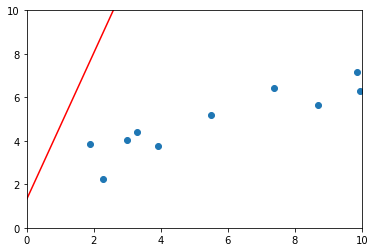

In [52]:
# f(x) = w*x + b -->cost(w,b)

w = 3.35976748
b = 1.33718897

plt.figure()

plt.scatter(X, Y)
plt.plot([0,10] , [b, 10*w + b] , c='r')

plt.xlim(0,10)
plt.ylim(0,10)

plt.show()
plt.close()

In [41]:
# w * x.T + b
def prediction(a, b, x) :
    result =  x*a.T + b
    return result 

In [45]:
def update_ab(a, b, x , error , lr) :
    a_delta = -(lr * (2/len(error)) * (np.dot(x.T , error)) ) 
    b_delta = -(lr * (2/len(error)) * np.sum(error) ) 
    return a_delta , b_delta


In [46]:
def gradient_descent(x, y , iters) :
    a = np.zeros((1,1))
    b = np.zeros((1,1))
    
    for idx in range(iters) :
        error = y - prediction(a, b , x)
        a_delta , b_delta = update_ab(a, b, x, error , lr=learning_rate )    
        a -= a_delta
        b -= b_delta
    return a, b


In [59]:
def plotting_graph(x, y, a, b) :
    y_pred = a * x + b
    
    plt.figure()
    
    plt.scatter(x,y)
    plt.plot(x , y_pred , c='red')
    
    plt.show()
    plt.close()

weight :  [[3.34958406]] bias :  [[1.2999784]]


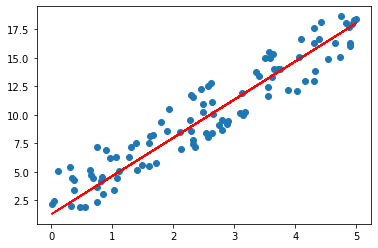

In [60]:
learning_rate = 0.005

x = 5*np.random.rand(100, 1)
y = 3*x + 5*np.random.rand(100, 1)

w , b = gradient_descent(x, y, iters=100)
print('weight : ' , w , 'bias : ' , b)
plotting_graph(x, y, w, b)


- 회귀 평가 지표

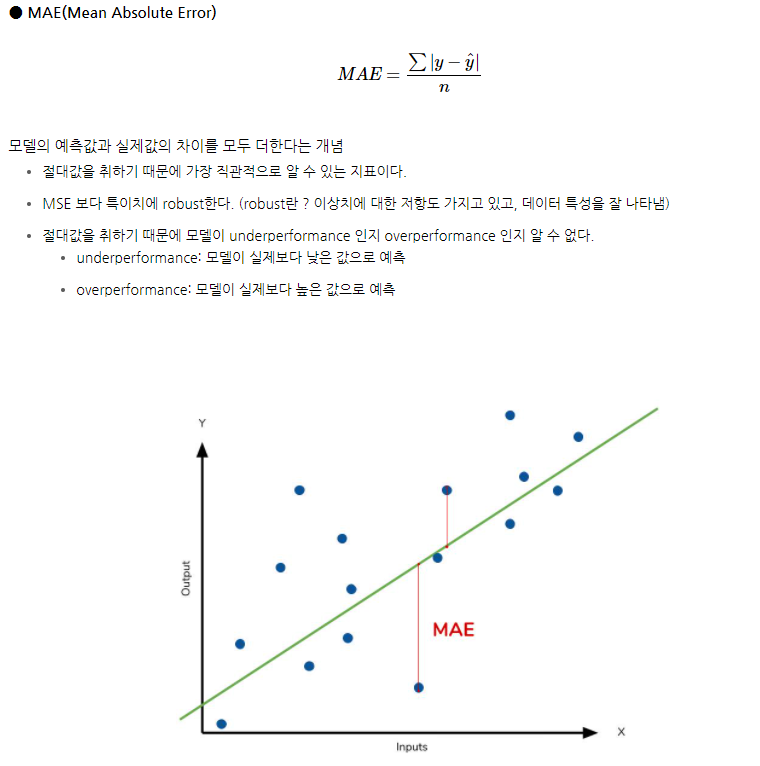

In [61]:
from IPython.display import Image
Image('c:/img/regression-eval-mae.png', width = 700)

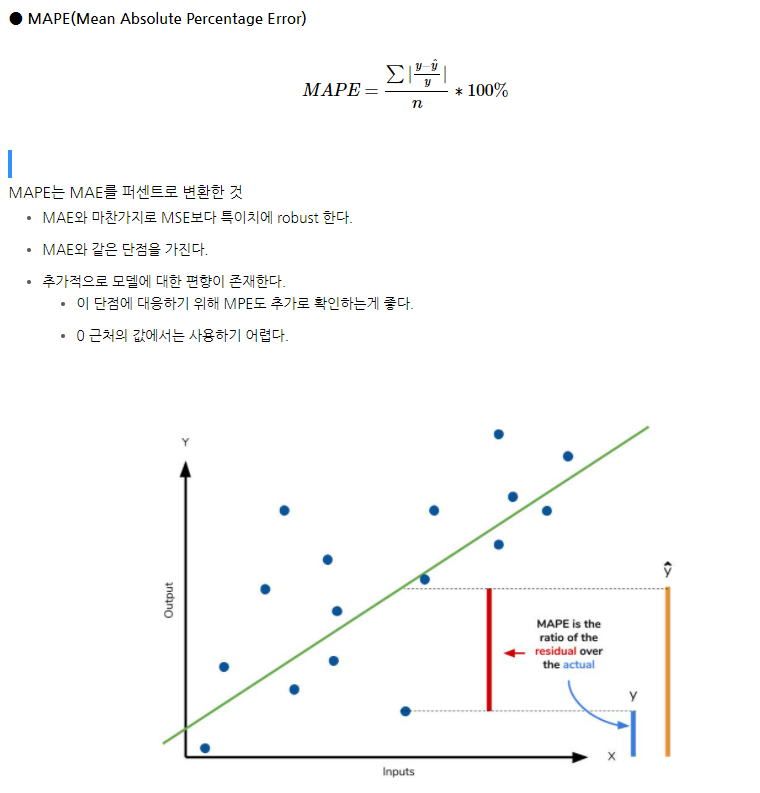

In [62]:
Image('c:/img/regression-eval-mape.png', width = 700)

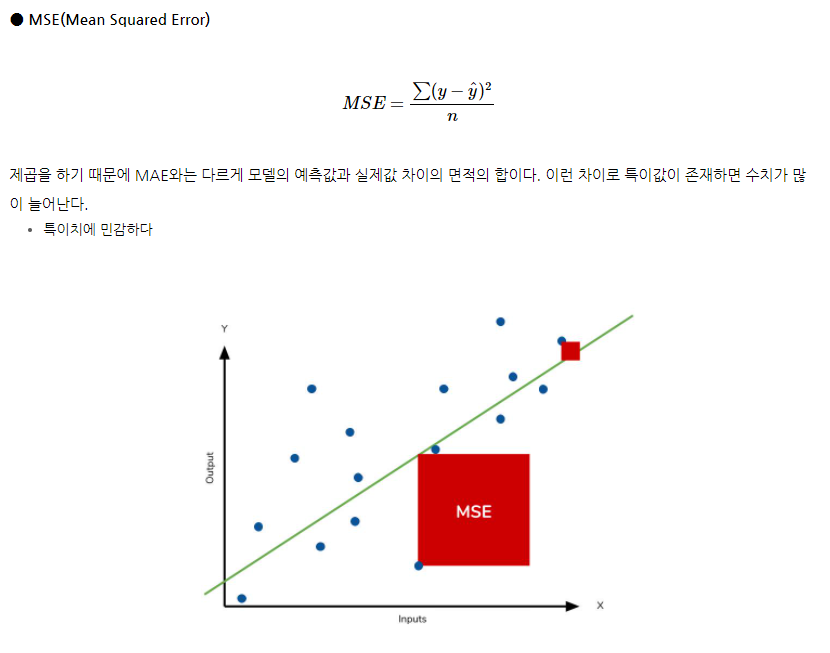

In [63]:
Image('c:/img/regression-eval-mse.png', width = 700)

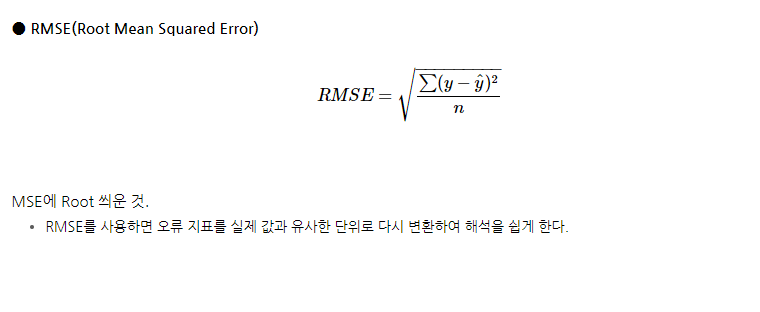

In [64]:
Image('c:/img/regression-eval-rmse.png', width = 700)

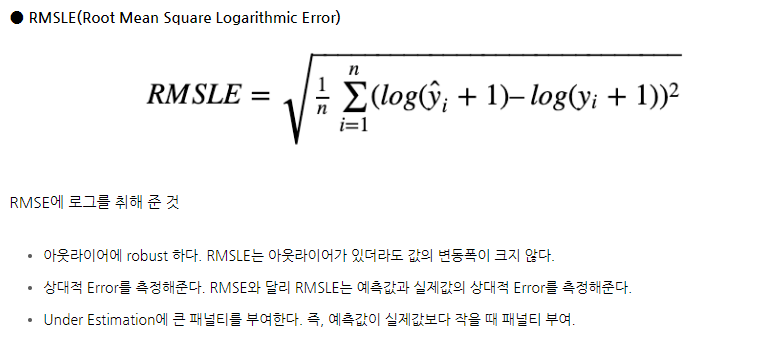

In [65]:
Image('c:/img/regression-eval-rmsle.png', width = 700)

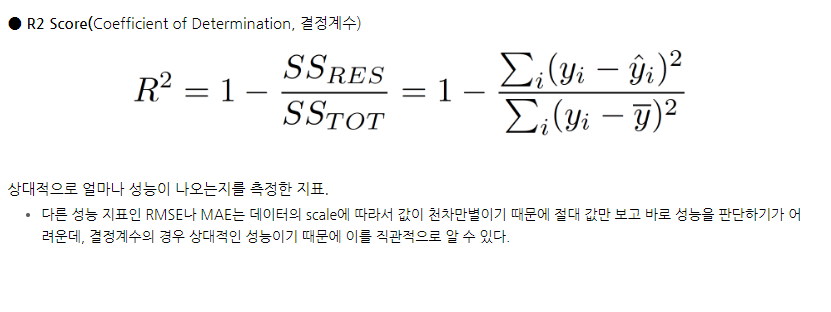

In [66]:
Image('c:/img/regression-eval-R2-Score.png', width = 700)

In [68]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [70]:
# 데이터 , 타켓을 프레임으로 만들고 타겟의 값을 target_names 으로 변경하는 최종 프레임 생성


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [82]:
featureDF = pd.DataFrame(data= iris.data, columns= iris.feature_names)
targetDF  = pd.DataFrame(data= iris.target, columns= ['species'])

In [83]:
featureDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [84]:
targetDF

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [90]:
# apply() 함수 이용
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'


In [91]:
targetDF['species'] = targetDF['species'].apply(converter)
targetDF

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [92]:
irisDF = pd.concat([featureDF, targetDF] , axis=1)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


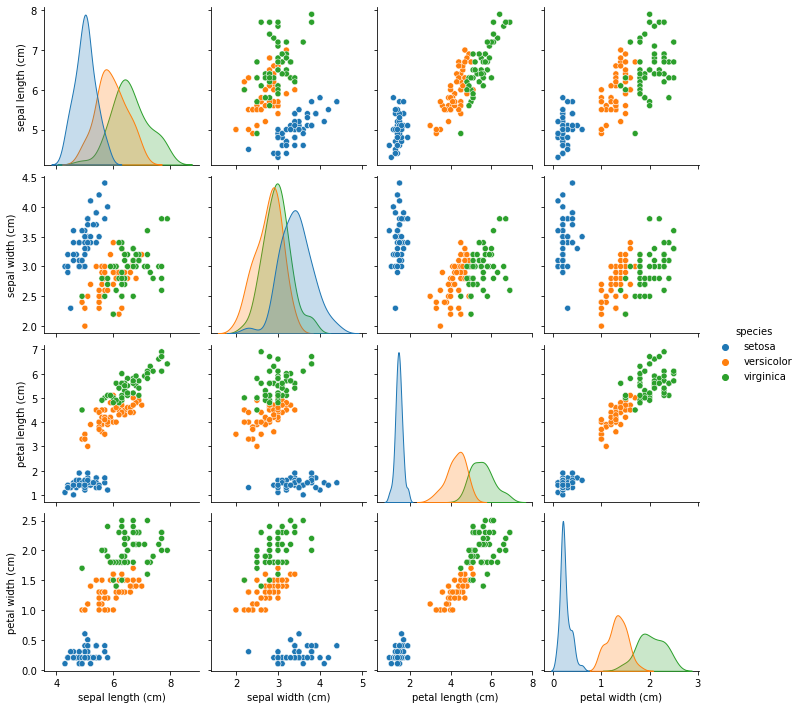

In [93]:
sns.pairplot(irisDF , hue = 'species')

In [96]:
from sklearn.linear_model    import LinearRegression 
from sklearn.model_selection import train_test_split 

from sklearn.metrics         import mean_absolute_error , mean_squared_error 

In [ ]:
irisDF.drop('species' , axis=1 , inplace=True)

In [99]:
targetDF  = pd.DataFrame(data= iris.target, columns= ['species'])

irisDF = pd.concat([irisDF , targetDF] , axis=1)

In [108]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [117]:
X = irisDF.drop('sepal length (cm)' , axis=1)
Y = irisDF['sepal length (cm)']

In [150]:
X_train , X_test , y_train, y_test = train_test_split(X, Y , test_size=0.2 , random_state=100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


print('mae  : ' , mean_absolute_error(y_test , y_pred))
print('mse  : ' , mean_squared_error(y_test , y_pred))
print('rmse : ' , np.sqrt(mean_squared_error(y_test , y_pred)) )
# 결정계수 R
print('R    : ' , lr_model.score(X , Y))


mae  :  0.2890424868777996
mse  :  0.12227797110201427
rmse :  0.3496826720070845
R    :  0.8587106939330678


In [151]:
irisDF.loc[2]

sepal length (cm)    4.7
sepal width (cm)     3.2
petal length (cm)    1.3
petal width (cm)     0.2
species              0.0
Name: 2, dtype: float64

In [152]:
y_pred[0]

6.39044386067281

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

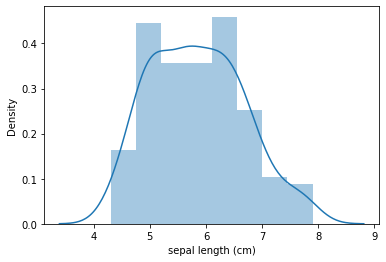

In [129]:
sns.distplot(Y)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Density'>

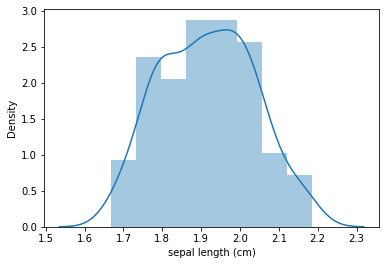

In [130]:
# 타겟은 로그변환을 통한 스케일링 작업이 필요함...
logY = np.log1p(Y)
sns.distplot(logY)

In [142]:
X_train , X_test , y_train, y_test = train_test_split(X, logY , test_size=0.2 , random_state=100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


print('mae  : ' , mean_absolute_error(y_test , y_pred))
print('mse  : ' , mean_squared_error(y_test , y_pred))
print('rmse : ' , np.sqrt(mean_squared_error(y_test , y_pred)) )
# 결정계수 R
print('R    : ' , lr_model.score(X , logY))


mae  :  0.03977866805458683
mse  :  0.0022196391045392156
rmse :  0.04711304601211023
R    :  0.8636380066281042


In [146]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def feature_scaling(method='None' , input_data=None):
    
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    
    if method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    
    return scaled_data

In [147]:
scalX = feature_scaling(method='MinMax' , input_data=X)

In [154]:
X_train , X_test , y_train, y_test = train_test_split(scalX, logY , test_size=0.2 , random_state=100)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


print('mae  : ' , mean_absolute_error(y_test , y_pred))
print('mse  : ' , mean_squared_error(y_test , y_pred))
print('rmse : ' , np.sqrt(mean_squared_error(y_test , y_pred)) )
# 결정계수 R
print('R    : ' , lr_model.score(scalX , logY))

mae  :  0.039778668054586803
mse  :  0.0022196391045392126
rmse :  0.0471130460121102
R    :  0.8636380066281043
